## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [72]:
xi = np.linspace(0,20,50)
print(xi)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [73]:
def y(x_in):
    return -1*x_in + 2

print(y(xi))

[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


#### Plot your data points. 

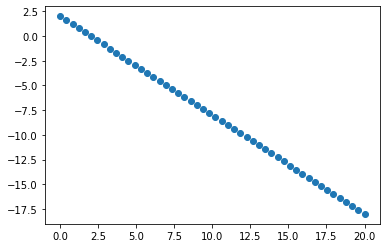

In [74]:
plt.scatter(xi,y(xi))
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [233]:
def GDB(alpha,x_in,y_op,max_itr):
    itr = 0
    t0 = 0
    t1 = 0
    m = len(x_in)
    cost_t = []
    theta_z = []
    theta_o = []
    
    y_pred = t0 + t1 *  x_in
    cost = (1/(2*m))*sum(((y_pred - y_op)**2))
    G_0 = (1/m) * sum((y_pred - y_op))
    G_1 = (1/m) * np.dot(y_pred - y_op , x_in)
    norm = np.linalg.norm([G_0,G_1])
    while norm >= 0.001 :
        if itr>=max_itr:
                break

        y_pred = t0 + t1 *  x_in
        cost =(1/(2*m))*sum(((y_pred - y_op)**2))
        cost_t.append(cost)
        G0 = (1/m) * sum((y_pred - y_op))
        G1 = (1/m) * np.dot(y_pred - y_op , x_in)
        norm = np.linalg.norm([G0,G1])
        t0_n = t0 - alpha * G0
        t1_n = t1 - alpha * G1
        t0 = t0_n
        theta_z.append(t0)
        t1 = t1_n
        theta_o.append(t1)
        itr += 1
            
        if itr>1:
            if abs(cost_t[-1]-cost_t[-2]) < 0.0001:
                break
        
        
           
    return t0 , t1 ,cost_t , itr , theta_z ,theta_o
        
    
        
    
t0_B,t1_B,cost_TB , IB, TZ ,TO = GDB(0.01,xi,y(xi),1000) 
print("theta0 = ",t0_B,"\n","theta1 = ",t1_B,"\n","no of itr:",IB)
print(len(cost_TB))



theta0 =  1.6125493800680892 
 theta1 =  -0.9711799166017774 
 no of itr: 652
652


In [234]:
y_Pred = t0_B + t1_B *  xi
print(y_Pred)

[  1.61254938   1.21614941   0.81974945   0.42334948   0.02694952
  -0.36945045  -0.76585042  -1.16225038  -1.55865035  -1.95505031
  -2.35145028  -2.74785025  -3.14425021  -3.54065018  -3.93705014
  -4.33345011  -4.72985008  -5.12625004  -5.52265001  -5.91904997
  -6.31544994  -6.71184991  -7.10824987  -7.50464984  -7.9010498
  -8.29744977  -8.69384973  -9.0902497   -9.48664967  -9.88304963
 -10.2794496  -10.67584956 -11.07224953 -11.4686495  -11.86504946
 -12.26144943 -12.65784939 -13.05424936 -13.45064933 -13.84704929
 -14.24344926 -14.63984922 -15.03624919 -15.43264916 -15.82904912
 -16.22544909 -16.62184905 -17.01824902 -17.41464899 -17.81104895]


In [235]:
from sklearn.metrics import r2_score
print(r2_score(y(xi),y_Pred))

0.9988854760396596


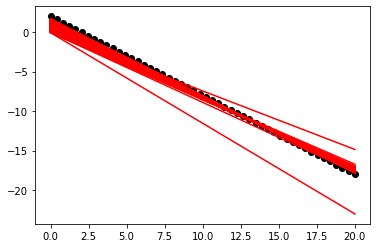

In [236]:
for i in range (len(TZ)):
    y_PredI = TZ[i] + TO[i] *  xi
    plt.plot(xi,y_PredI,"red")
    
plt.scatter(xi,y(xi),color="black")
plt.show()

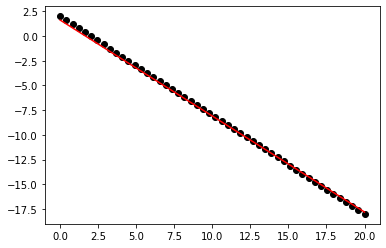

In [237]:
fig , ab = plt.subplots()
ab.scatter(xi,y(xi),color="black")
ab.plot(xi,y_Pred,color="red")
plt.show()


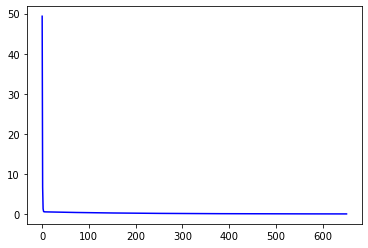

In [238]:
itra = np.arange(0,IB)
plt.plot(itra,cost_TB,'blue')
plt.show()

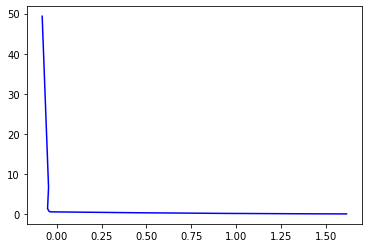

In [239]:
plt.plot(TZ,cost_TB,'blue')
plt.show()

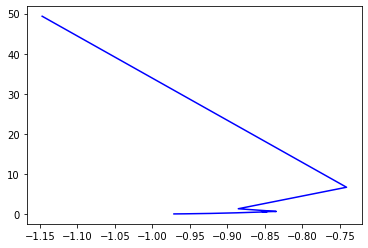

In [240]:
plt.plot(TO,cost_TB,'blue')
plt.show()

theta0 =  0.7695212725461751 
 theta1 =  -0.9084722085328186 
 no of itr: 2017
Accuracy is :  0.9887590009970557


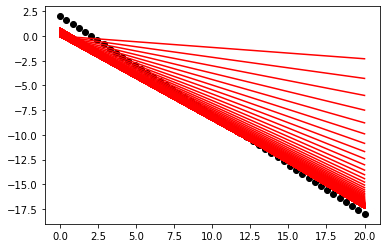

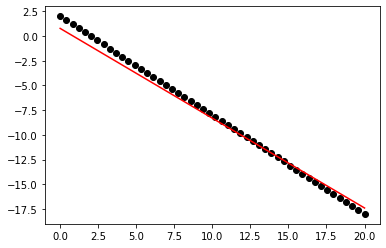

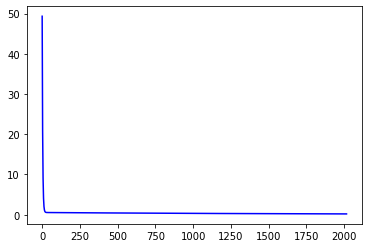

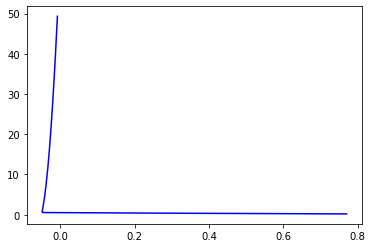

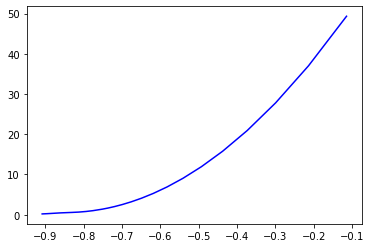

In [252]:
t00_B,t01_B,cost_0TB , IB0, TZ0 ,TO0 = GDB(0.001,xi,y(xi),5000) 
print("theta0 = ",t00_B,"\n","theta1 = ",t01_B,"\n","no of itr:",IB0)

y0_Pred = t00_B + t01_B *  xi

from sklearn.metrics import r2_score
print("Accuracy is : ",r2_score(y(xi),y0_Pred))

for i in range (len(TZ0)):
    y0_PredI = TZ0[i] + TO0[i] *  xi
    plt.plot(xi,y0_PredI,"red")
    
plt.scatter(xi,y(xi),color="black")
plt.show()

fig , ab0 = plt.subplots()
ab0.scatter(xi,y(xi),color="black")
ab0.plot(xi,y0_Pred,color="red")
plt.show()

itra0 = np.arange(0,IB0)
plt.plot(itra0,cost_0TB,'blue')
plt.show()

plt.plot(TZ0,cost_0TB,'blue')
plt.show()

plt.plot(TO0,cost_0TB,'blue')
plt.show()



### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

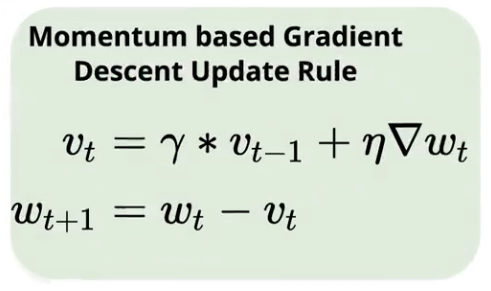

#### γ takes values between 0 and 1.
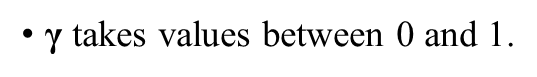

In [225]:
def GDM(alphaM,xin_M,yop_M,max_itrM,gamaM):
    itr = 0
    t0 = 0
    t1 = 0
    m = len(xin_M)
    cost_tM = []
    T0_M = []
    T1_M = []
    V0_M = 0
    V1_M = 0
    
    ym_pred = t0 + t1 *  xin_M
    cost = (1/(2*m))*sum(((ym_pred - yop_M)**2))
    G0_M = (1/m) * sum((ym_pred - yop_M))
    G1_M = (1/m) * np.dot(ym_pred - yop_M , xin_M)
    norm = np.linalg.norm([G0_M,G1_M])
    
    
    while norm >= 0.001 :
        if itr>=max_itrM:
                break
        ym_pred = t0 + t1 *  xin_M
        cost =(1/(2*m))*sum(((ym_pred - yop_M)**2))
        cost_tM.append(cost)
        G0_M = (1/m) * sum((ym_pred - yop_M))
        G1_M = (1/m) * np.dot(ym_pred - yop_M , xin_M)
        V0_M = gamaM * V0_M + alphaM * G0_M
        V1_M = gamaM * V1_M + alphaM * G1_M
        norm = np.linalg.norm([G0_M,G1_M])
        t0_n = t0 - V0_M
        t1_n = t1 - V1_M
        t0 = t0_n
        T0_M.append(t0)
        t1 = t1_n
        T1_M.append(t1)
        itr += 1
        
        if itr>1:
            if abs(cost_tM[-1]-cost_tM[-2]) < 0.0001:
                break
        
           
    return t0 , t1 ,cost_tM , itr , T0_M , T1_M
        
    
        
    
t0_M , t1_M, cost_TM , IM , TZ_M , TO_M = GDM(0.01,xi,y(xi),500,0.5) 
print("theta0 = ",t0_M,"\n","theta1 = ",t1_M,"\n","no of itr:",IM)
print(len(cost_TM))

theta0 =  1.7288017588348068 
 theta1 =  -0.9798272204875923 
 no of itr: 394
394


In [214]:
ypred_M = t0_M + t1_M *  xi
print(ypred_M)

[  1.72880176   1.32887228   0.9289428    0.52901333   0.12908385
  -0.27084563  -0.67077511  -1.07070459  -1.47063406  -1.87056354
  -2.27049302  -2.6704225   -3.07035197  -3.47028145  -3.87021093
  -4.27014041  -4.67006989  -5.06999936  -5.46992884  -5.86985832
  -6.2697878   -6.66971727  -7.06964675  -7.46957623  -7.86950571
  -8.26943518  -8.66936466  -9.06929414  -9.46922362  -9.8691531
 -10.26908257 -10.66901205 -11.06894153 -11.46887101 -11.86880048
 -12.26872996 -12.66865944 -13.06858892 -13.4685184  -13.86844787
 -14.26837735 -14.66830683 -15.06823631 -15.46816578 -15.86809526
 -16.26802474 -16.66795422 -17.0678837  -17.46781317 -17.86774265]


In [215]:
from sklearn.metrics import r2_score
print(r2_score(y(xi),ypred_M))

0.9994539524956941


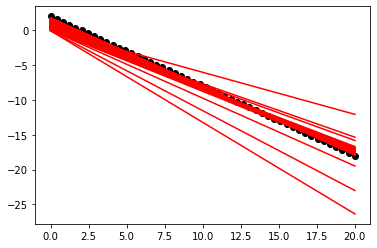

In [216]:
for i in range (len(TZ_M)):
    y_PredIM = TZ_M[i] + TO_M[i] *  xi
    plt.plot(xi,y_PredIM,"red")
    
plt.scatter(xi,y(xi),color="black")
plt.show()

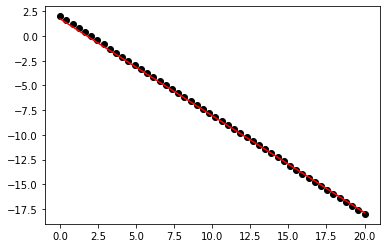

In [217]:
fig , am = plt.subplots()
am.scatter(xi,y(xi),color="black")
am.plot(xi,ypred_M,color="red")
plt.show()


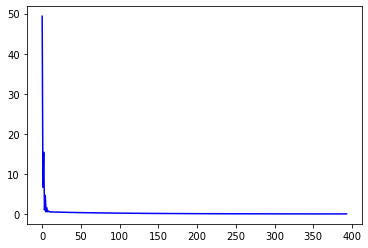

In [218]:
itra_M = np.arange(0,IM)
plt.plot(itra_M,cost_TM,'blue')
plt.show()

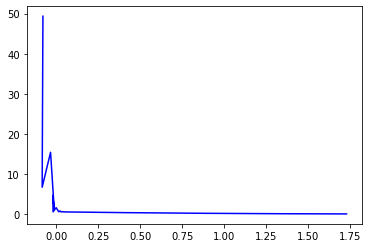

In [219]:
plt.plot(TZ_M,cost_TM,'blue')
plt.show()

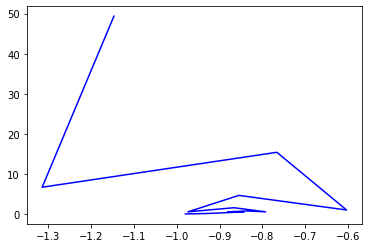

In [220]:
plt.plot(TO_M,cost_TM,'blue')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

theta0 =  1.4399056643347472 
 theta1 =  -0.9583255164657414 
 no of itr: 100
Accuracy:  0.9976709404322145


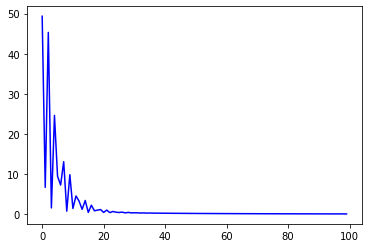

In [221]:
t0_M8 , t1_M8, cost_TM8 , IM8 , TZ_M8 , TO_M8 = GDM(0.01,xi,y(xi),100,0.8) 
print("theta0 = ",t0_M8,"\n","theta1 = ",t1_M8,"\n","no of itr:",IM8)

ypred_M8 = t0_M8 + t1_M8 *  xi

from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y(xi),ypred_M8))

itra_M8 = np.arange(0,IM8)
plt.plot(itra_M8,cost_TM8,'blue')
plt.show()


theta0 =  0.44830961379058776 
 theta1 =  -0.8845792365834015 
 no of itr: 100
Accuracy:  0.9821241448014891


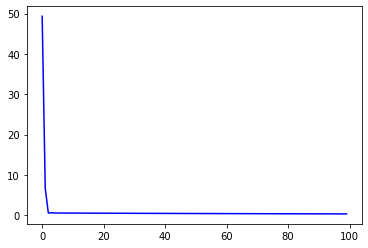

In [222]:
t0_M1 , t1_M1, cost_TM1 , IM1 , TZ_M1 , TO_M1 = GDM(0.01,xi,y(xi),100,0.1) 
print("theta0 = ",t0_M1,"\n","theta1 = ",t1_M1,"\n","no of itr:",IM1)

ypred_M1 = t0_M1 + t1_M1 *  xi

from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y(xi),ypred_M1))

itra_M1 = np.arange(0,IM1)
plt.plot(itra_M1,cost_TM1,'blue')
plt.show()


theta0 =  0.40375068573478695 
 theta1 =  -0.8812647702833366 
 no of itr: 100
Accuracy:  0.9810827441894172


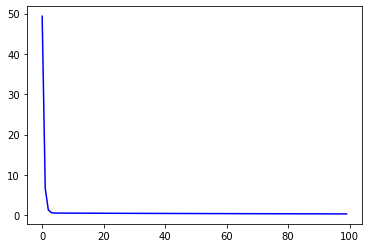

In [223]:
t0_M0 , t1_M0, cost_TM0 , IM0 , TZ_M0 , TO_M0 = GDM(0.01,xi,y(xi),100,0) 
print("theta0 = ",t0_M0,"\n","theta1 = ",t1_M0,"\n","no of itr:",IM0)

ypred_M0 = t0_M0 + t1_M0 *  xi

from sklearn.metrics import r2_score
print("Accuracy: ",r2_score(y(xi),ypred_M0))

itra_M0 = np.arange(0,IM0)
plt.plot(itra_M0,cost_TM0,'blue')
plt.show()


### Update your Batch GD for one variable  implementation to be NAG and check your results

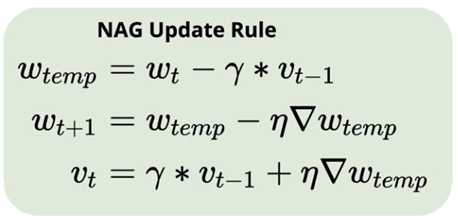

In [157]:
def GDB_NAG(alphaN,xin_N,yop_N,max_itrN,gamaN):
    itr = 0
    t0 = 0
    t1 = 0
    m = len(xin_N)
    cost_tN = []
    T0_N = []
    T1_N = []
    V0_N = 0
    V1_N = 0

    for i in range(max_itrN):
        ypred_N = t0 + t1 *  xin_N
        cost =(1/(2*m))*sum(((ypred_N - yop_N)**2))
        cost_tN.append(cost)
        t0_temp = t0 - gamaN * V0_N
        t1_temp = t1 - gamaN * V1_N
        ypredN_temp = t0_temp + t1_temp *  xin_N
        G0N_temp= (1/m) * sum((ypredN_temp - yop_N))
        G1N_temp = (1/m) * np.dot(ypredN_temp - yop_N , xin_N)
        t0_n = t0_temp - alphaN * G0N_temp
        t0 = t0_n
        t1_n = t1_temp - alphaN * G1N_temp
        t1 = t1_n
        V0_N = gamaN * V0_N + alphaN*G0N_temp
        V1_N = gamaN * V1_N + alphaN*G1N_temp

        
        T0_N.append(t0)
        T1_N.append(t1)
        itr += 1
        
           
    return t0 , t1 ,cost_tN , itr , T0_N ,T1_N
        
    
        
    
t0_N,t1_N,cost_TN , IN, TZ_N ,TO_N = GDB_NAG(0.01,xi,y(xi),200,0.5)
print("theta0 = ",t0_N,"\n","theta1 = ",t1_N,"\n","no of itr:",IN)
print(len(cost_TN))

theta0 =  1.2596268677447982 
 theta1 =  -0.9449281680820436 
 no of itr: 200
200


In [158]:
ypred_N = t0_N + t1_N *  xi
print(ypred_N)

[  1.25962687   0.8739419    0.48825693   0.10257197  -0.283113
  -0.66879797  -1.05448293  -1.4401679   -1.82585286  -2.21153783
  -2.5972228   -2.98290776  -3.36859273  -3.7542777   -4.13996266
  -4.52564763  -4.9113326   -5.29701756  -5.68270253  -6.0683875
  -6.45407246  -6.83975743  -7.2254424   -7.61112736  -7.99681233
  -8.3824973   -8.76818226  -9.15386723  -9.5395522   -9.92523716
 -10.31092213 -10.6966071  -11.08229206 -11.46797703 -11.853662
 -12.23934696 -12.62503193 -13.0107169  -13.39640186 -13.78208683
 -14.16777179 -14.55345676 -14.93914173 -15.32482669 -15.71051166
 -16.09619663 -16.48188159 -16.86756656 -17.25325153 -17.63893649]


In [159]:
from sklearn.metrics import r2_score
print(r2_score(y(xi),ypred_N))

0.9959303412950739


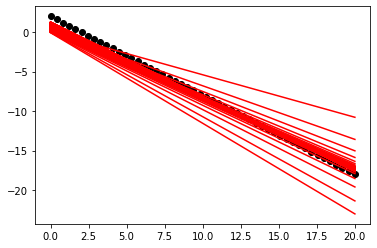

In [160]:
for i in range (len(TZ_N)):
    y_PredIN = TZ_N[i] + TO_N[i] *  xi
    plt.plot(xi,y_PredIN,"red")
    
plt.scatter(xi,y(xi),color="black")
plt.show()

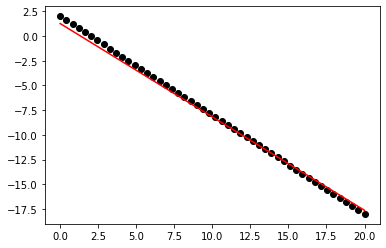

In [188]:
fig , an = plt.subplots()
an.scatter(xi,y(xi),color="black")
an.plot(xi,ypred_N,color="red")
plt.show()

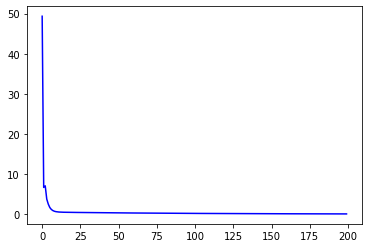

In [161]:
itra_N = np.arange(0,IN)
plt.plot(itra_N,cost_TN,'blue')
plt.show()

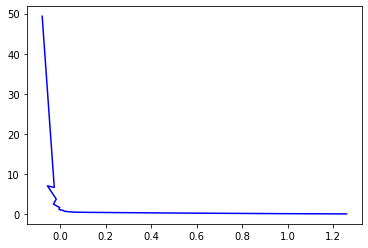

In [162]:
plt.plot(TZ_N,cost_TN,'blue')
plt.show()

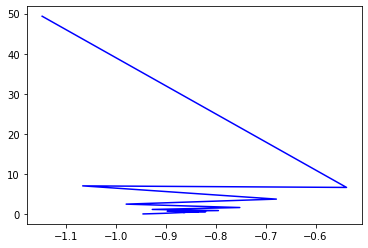

In [163]:
plt.plot(TO_N,cost_TN,'blue')
plt.show()

In [184]:
#NAG with stop condition
def GD_NAG(alphaN,xin_N,yop_N,max_itrN,gamaN):
    itr = 0
    t0 = 0
    t1 = 0
    m = len(xin_N)
    cost_tN = []
    T0_N = []
    T1_N = []
    V0_N = 0
    V1_N = 0
    
    ypred_N = t0 + t1 *  xin_N
    G0_N = (1/m) * sum((ypred_N - yop_N))
    G1_N = (1/m) * np.dot(ypred_N - yop_N , xin_N)
    norm = np.linalg.norm([G0_N,G1_N])
    
    
    while norm >= 0.001 :
        if itr >= max_itrN:
            break
        ypred_N = t0 + t1 *  xin_N
        cost =(1/(2*m))*sum(((ypred_N - yop_N)**2))
        cost_tN.append(cost)
        t0_temp = t0 - gamaN * V0_N
        t1_temp = t1 - gamaN * V1_N  
        ypredN_temp = t0_temp + t1_temp *  xin_N
        G0N_temp= (1/m) * sum((ypredN_temp - yop_N))
        G1N_temp = (1/m) * np.dot(ypredN_temp - yop_N , xin_N)
        norm = np.linalg.norm([G0N_temp,G1N_temp])
        t0 = t0_temp - alphaN * G0N_temp
        t1 = t1_temp - alphaN * G1N_temp
        V0_N = gamaN*V0_N + alphaN * G0N_temp
        V1_N = gamaN*V1_N + alphaN * G1N_temp
        
        T0_N.append(t0)
        T1_N.append(t1)
        itr += 1
        
        if itr > 1:
            if abs(cost_tN[-1] - cost_tN[-2]) < 0.0001:
                break
                   
           
    return t0 , t1 ,cost_tN , itr , T0_N ,T1_N
        
    
        
    
t0_BN,t1_BN,costB_TN , IBN, TZ_BN ,TO_BN = GD_NAG(0.01,xi,y(xi),500,0.5) 
print("theta0 = ",t0_BN,"\n","theta1 = ",t1_BN,"\n","no of itr:",IBN)
print(len(costB_TN))


theta0 =  1.7287740457226681 
 theta1 =  -0.9798251590785714 
 no of itr: 395
395


In [185]:
ypred_SN = t0_BN + t1_BN * xi
print(ypred_SN)

[  1.72877405   1.32884541   0.92891677   0.52898814   0.1290595
  -0.27086914  -0.67079777  -1.07072641  -1.47065505  -1.87058368
  -2.27051232  -2.67044095  -3.07036959  -3.47029823  -3.87022686
  -4.2701555   -4.67008414  -5.07001277  -5.46994141  -5.86987005
  -6.26979868  -6.66972732  -7.06965595  -7.46958459  -7.86951323
  -8.26944186  -8.6693705   -9.06929914  -9.46922777  -9.86915641
 -10.26908505 -10.66901368 -11.06894232 -11.46887095 -11.86879959
 -12.26872823 -12.66865686 -13.0685855  -13.46851414 -13.86844277
 -14.26837141 -14.66830004 -15.06822868 -15.46815732 -15.86808595
 -16.26801459 -16.66794323 -17.06787186 -17.4678005  -17.86772914]


In [186]:
from sklearn.metrics import r2_score
print(r2_score(y(xi),ypred_SN))

0.9994538408913648


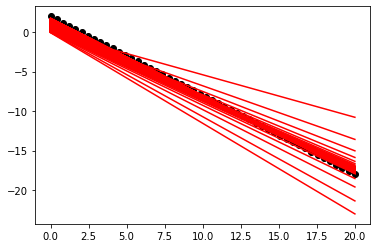

In [187]:
for i in range (len(TZ_BN)):
    y_PredISN = TZ_BN[i] + TO_BN[i] *  xi
    plt.plot(xi,y_PredISN,"red")
    
plt.scatter(xi,y(xi),color="black")
plt.show()

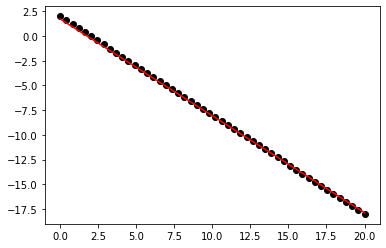

In [189]:
fig , asn = plt.subplots()
asn.scatter(xi,y(xi),color="black")
asn.plot(xi,ypred_SN,color="red")
plt.show()

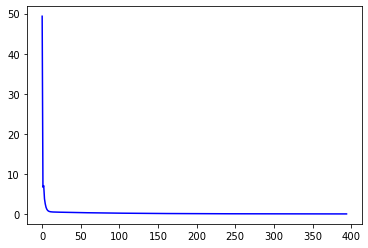

In [191]:
itra_SN = np.arange(0,IBN)
plt.plot(itra_SN,costB_TN,'blue')
plt.show()

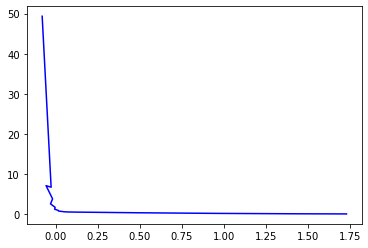

In [192]:
plt.plot(TZ_BN,costB_TN,'blue')
plt.show()

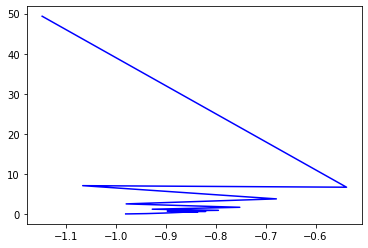

In [193]:
plt.plot(TO_BN,costB_TN,'blue')
plt.show()

## Congratulations 
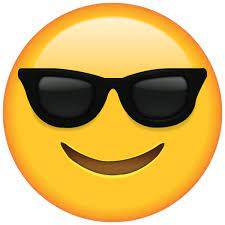